In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Geçen Haftalardan Kullanacağımız Fonksyonlar

In [2]:
def mypgmread(name):
    with open(str(name),'rb') as mypgm:
        file = mypgm.read()
        header=''
        width=''
        height=''
        resolution=''
        #Data type is first two characters followed by end line
        for x in range (0,2):
            header=header+chr(file[x])
        # Check for comments starting from third character
        # We also need to itarete once more after each variable to get trough line breaks
        x=3
        if (chr(file[x])=='#'):
            comment = True
            while comment:
                if (chr(file[x])=='\n')and(chr(file[x+1])!='#'):
                    comment = False
                x = x+1
        # Width an Height are seperated by white space. 
        while (chr(file[x])!=' '):
            width = width+chr(file[x])
            x = x+1
        x = x+1
        while(chr(file[x])!='\n'):
            height = height+chr(file[x])
            x = x+1
        x = x+1
        while(chr(file[x])!='\n'):
            resolution = resolution+chr(file[x])
            x = x+1
        x = x+1
        
        bytepixels = file[x:]
        pixels = list(bytepixels)
        mypgm.close()
    return name,int(width),int(height),int(resolution),pixels

In [8]:
def mypgmlogtransform(c,pixels):
    
    pixels = np.array(pixels)
    pixels = pixels.astype(int)
    for s in range(len(pixels)):
        pixels[s]=c*np.log(1+pixels[s])

    
    return pixels

## Bu hafta iki boyutlu Fourier Transform algoritmasını gerçekleyeceğiz. Bu işlemi önce her satırın Fft'sini alıp sonra elde ettiğimiz matrisin her sütununun Fft'sini alarak gerçeklememiz işlem yükünü N^4 ten 2N^2log2(N) civarına indirir. 

In [3]:
def ffthorizontal(pixels):
    pixels = np.array(pixels)
    pixels = np.reshape(pixels,(h,w))
    pixels = pixels.astype(complex)
    for a in range(0,h):
        pixels[a,:] = np.fft.fft(pixels[a,:])
    return pixels

In [4]:
def fftvertical(pixels):
    pixels = np.array(pixels)
    pixels = np.reshape(pixels,(h,w))
    pixels = pixels.astype(complex)
    for b in range(0,w):
        pixels[:,b] = np.fft.fft(pixels[:,b])
    return pixels

In [5]:
def my2dfft(pixels):
    pixels = np.array(pixels)
    pixels = np.reshape(pixels,(h,w))
    pixelsfh = ffthorizontal(pixels)
    pixels = fftvertical(pixelsfh)
    for x in range(0,h):
        for y in range(0,w):
            pixels[x][y]=pixels[x][y]/(h)
    return pixels

## Ters 2 boyutlu FFT işlemini gerçeklemek için kitaptaki tablo 4.2 de gösterilfiği gibi F*(uv) nin FT'si MNf*(x,y) yi elde etmemizi sağlar (* işareti konjuge anlamındadır) bu yüzden elimizdeki 2 Boyutlu FFT algoritmasıyla Ters Fourier işlemini gerçekliyebiliriz.

In [12]:
def my2difft(pixelsfft):
    for x in range(0,h):
        for y in range(0,w):
            pixelsfft[x][y] = pixelsfft[x][y].conjugate()
    pixelsfft = my2dfft(pixelsfft)
    for x in range(0,w):
        for y in range(0,h):
            pixelsfft[x][y] = pixelsfft[x][y].conjugate()
    for x in range(0,w):
        for y in range(0,h):
            pixelsfft[x][y] = np.abs(pixelsfft[x][y])
    return pixelsfft

## 2 boyutlu frekans domaininde dc değeri köşelerin etrafındadır. görsel inceleme yapmak için dc değerini görselin ortasına almak daha işlevseldir. Bunu gerçekliyebilmek için orjinal görseli (-1)^(x+y) ile çarpıp 2 boyutlu FFT'sini alırsak dc değeri ortaya kaydırılmış 2 boyutlu frekans bilgisini elde ederiz. 

In [18]:
def fftshift2d(pixels):
    for x in range(0,w):
        for y in range(0,h):
            pixels[x][y]=pixels[x][y]*pow((-1),(x+y))
    return pixels
    

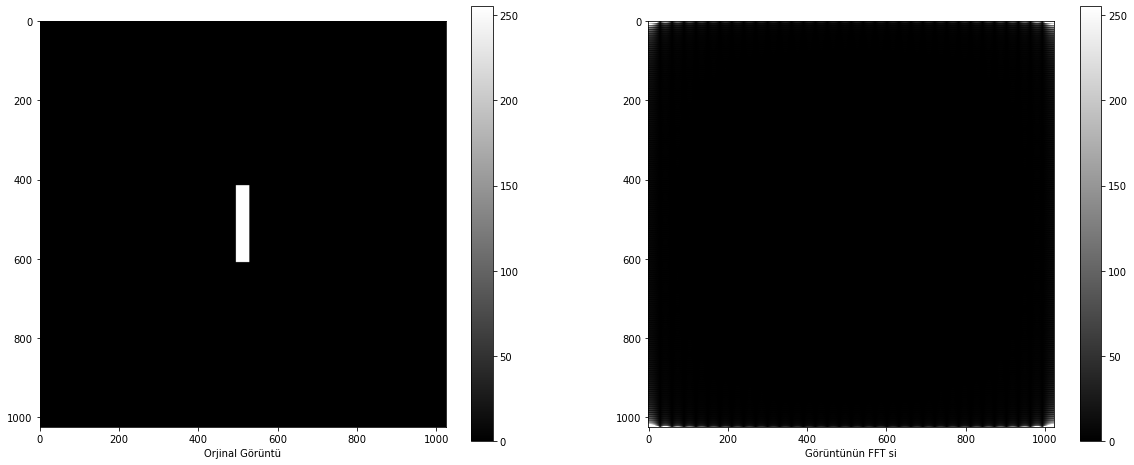

In [25]:
name,w,h,res,pixels = mypgmread('Fig0424(a)(rectangle).pgm')
pixels = np.array(pixels)
pixels = np.reshape(pixels,(h,w))
plt.figure( figsize=(20,20))
plt.subplot(1,2,1)
plt.xlabel('Orjinal Görüntü')
plt.imshow(pixels, cmap="gray",vmin=0,vmax=255)
plt.colorbar(shrink=0.4)

pixelsfft = my2dfft(pixels)



plt.subplot(1,2,2)
plt.xlabel('Görüntünün FFT si')
plt.imshow(np.abs(pixelsfft), cmap="gray",vmin=0,vmax=255)
plt.colorbar(shrink=0.4)

## Frekans domaininde Dc değer olan köşelerde değer gözlemliyoruz

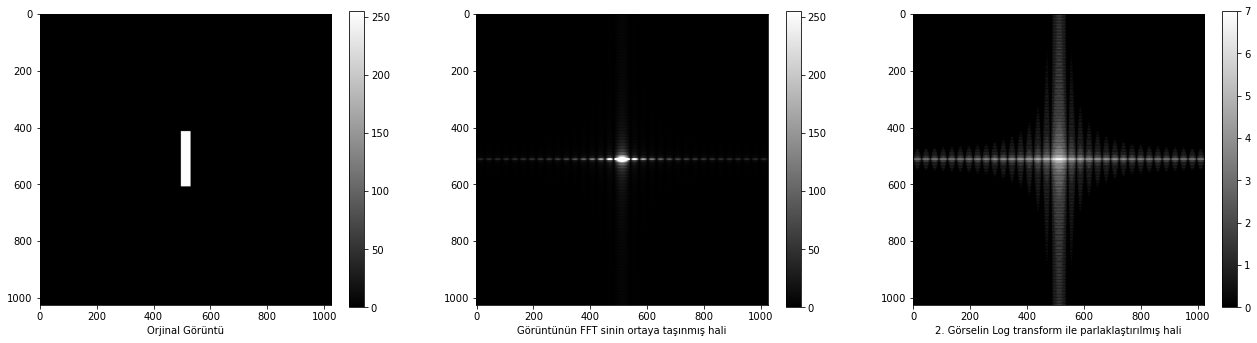

In [28]:
name,w,h,res,pixels = mypgmread('Fig0424(a)(rectangle).pgm')
pixels = np.array(pixels)
pixels = np.reshape(pixels,(h,w))
plt.figure(figsize = (30,30))
plt.subplot(2,4,1)
plt.xlabel('Orjinal Görüntü')
plt.imshow(pixels, cmap="gray",vmin=0,vmax=255)
plt.colorbar(shrink = 0.4)


pixels = fftshift2d(pixels)
        


pixelsfft = my2dfft(pixels)


plt.subplot(2,4,2)
plt.xlabel('Görüntünün FFT sinin ortaya taşınmış hali')
plt.imshow(np.abs(pixelsfft), cmap="gray",vmin=0,vmax=255)
plt.colorbar(shrink = 0.4)

pixelsfft = mypgmlogtransform(1,abs(pixelsfft))

 
plt.subplot(2,4,3)
plt.xlabel('2. Görselin Log transform ile parlaklaştırılmış hali')
plt.imshow(np.abs(pixelsfft), cmap="gray")
plt.colorbar(shrink = 0.4)





## Orjinal görüntü (-1)^(x+y) ile çarpıldıktan sonra 2 boyutlu FFT'si alınarak ortaya taşınmış DC değerli FFT elde edilmiştir (Tek boyuttaki fftshift gibi)

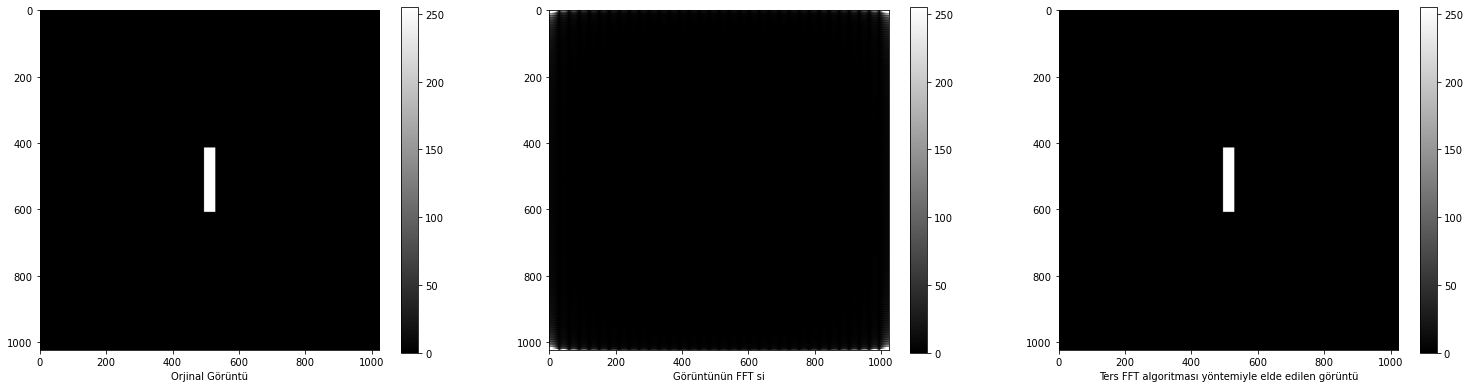

In [29]:
name,w,h,res,pixels = mypgmread('Fig0424(a)(rectangle).pgm')
pixels = np.array(pixels)
pixels = np.reshape(pixels,(h,w))
plt.figure(figsize = (35,35))
plt.subplot(2,4,1)
plt.xlabel('Orjinal Görüntü')
plt.imshow(pixels, cmap="gray",vmin=0,vmax=255)
plt.colorbar(shrink=0.4)

pixelsfft = my2dfft(pixels)



plt.subplot(2,4,2)
plt.xlabel('Görüntünün FFT si')
plt.imshow(np.abs(pixelsfft), cmap="gray",vmin=0,vmax=255)
plt.colorbar(shrink=0.4)

pixels = my2difft(pixelsfft)

plt.subplot(2,4,3)
plt.xlabel('Ters FFT algoritması yöntemiyle elde edilen görüntü')
plt.imshow(np.abs(pixels), cmap="gray",vmin=0,vmax=255)
plt.colorbar(shrink=0.4)

## Yukarıda anlatılan şekilde oluşturduğumuz 2d fft algoritmasını olduğu gibi kullanarak oluşturduğumuz ters iki boyutlu FFT ile orjinal görüntüyü 2 Boyutlu frekans bilgisinden geri elde ettik